## Import Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
#sns.set_style('darkgrid')
sns.set(font_scale=3,font="simhei")

#--- 改变字体
font = {'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

#--- plt设置
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


Bad key "text.kerning_factor" on line 4 in
D:\software\anaconda\anaconda\Lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# 44

In [3]:
df = pd.read_csv('D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/44/e_result.csv')
df['obj_second_stage'] = df['obj'] - df['f'] - df['h']
df['total_demand'] =  np.fmax(df['sum_I']*df['utilization_rate'], df['unmet_demand']/(1-df['fulfill_rate']))
df['unfulfill_rate'] = 1 - df['fulfill_rate']
print(df.shape)
print(df.info())
df.head()

FileNotFoundError: [Errno 2] File D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/44/e_result.csv does not exist: 'D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/44/e_result.csv'

In [ ]:
data = df.groupby(by=['graph', 'model', 'rho', 'cv', 'kappa'], as_index=False).mean()
print(data.shape)
#  data.groupby(by=['model', 'rho', 'cv'], as_index=False).count() : 20 for each (model, rho, cv)

## (rho, cv, kappa) = (0.3, *, 1.0)

In [ ]:
g = sns.catplot(x="cv", y="total_cost", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='box', 
                aspect=2.5,
                data=data.query('rho==0.3&kappa==1.0'))
g = sns.relplot(x="cv", y="unmet_demand", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='line', err_style="bars", ci=68,
                aspect=2.5,
                data=data.query('rho==0.3&kappa==1.0'))

## (rho, cv, kappa) = (*, 0.3, 1.0)

In [ ]:
g = sns.catplot(x="rho", y="total_cost", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='box', 
                aspect=2.5,
                data=data.query('cv==0.3&kappa==1.0'))
g = sns.relplot(x="rho", y="unmet_demand", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='line', err_style="bars", ci=68,
                aspect=2.5,
                data=data.query('cv==0.3&kappa==1.0'))

## (rho, cv, kappa) = (0.3, 0.3, *)

In [ ]:
g = sns.catplot(x="kappa", y="total_cost", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='box', 
                aspect=2.5,
                data=data.query('cv==0.3&rho==0.3'))
g = sns.relplot(x="kappa", y="unmet_demand", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='line', err_style="bars", ci=68,
                aspect=2.5,
                data=data.query('cv==0.3&rho==0.3'))

## obj_second_stage & simulation_second_stage  Difference

In [ ]:
f, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
f.set_size_inches(15, 5)
for k, query_sentence in enumerate(['cv==0.3&rho==0.3', 'cv==0.3&kappa==1.0', 'rho==0.3&kappa==1.0']):
    ax = sns.scatterplot(x='obj_second_stage', y='unmet_demand', 
                        hue='model', hue_order=['saa','co','mv'], 
                        data=data.query(query_sentence),
                        ax=axes[k])
    ax.plot(np.linspace(-20,500,1000), np.linspace(-20,500,1000))
ax.set(**{'ylim':(-10, 150),
         'xlim':(-10, 150)})


## histogram groupby (graph, model)
#### Left: average on all (cv, rho, kappa)
#### Right: (cv, rho, kappa) = 0.3, 0.3, 1.0

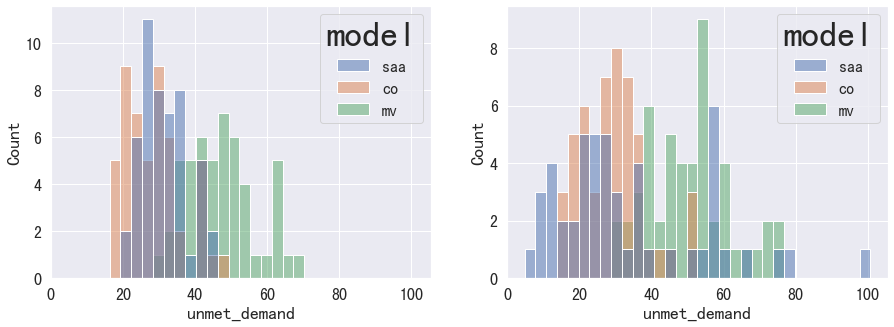

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
co,50000.0,29.481823,98.419559,0.000000e+00,0.0,0.0,0.0,1137.736268
mv,50000.0,50.374908,132.003086,-4.547474e-13,0.0,0.0,0.0,1278.722081
saa,50000.0,33.827416,106.752619,-4.547474e-13,0.0,0.0,0.0,1157.342723


In [303]:
f, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
f.set_size_inches(15, 5)
g = sns.histplot(x='unmet_demand',
                 hue='model', hue_order=['saa', 'co','mv'],
                 stat='count', multiple='layer',
                 binwidth=3,
                data=df.groupby(['graph', 'model'], as_index=False).mean(),
                ax=axes[0])
g = sns.histplot(x='unmet_demand',
                 hue='model', hue_order=['saa', 'co','mv'],
                 stat='count', multiple='layer',
                 binwidth=3,
                data=df.query('cv==0.3&rho==0.3&kappa==1.0').groupby(['graph', 'model'], as_index=False).mean(),
                ax=axes[1])
plt.show()
df.query('cv==0.3&rho==0.3&kappa==1.0').groupby(['model'])['unmet_demand'].describe()

## Worst Case

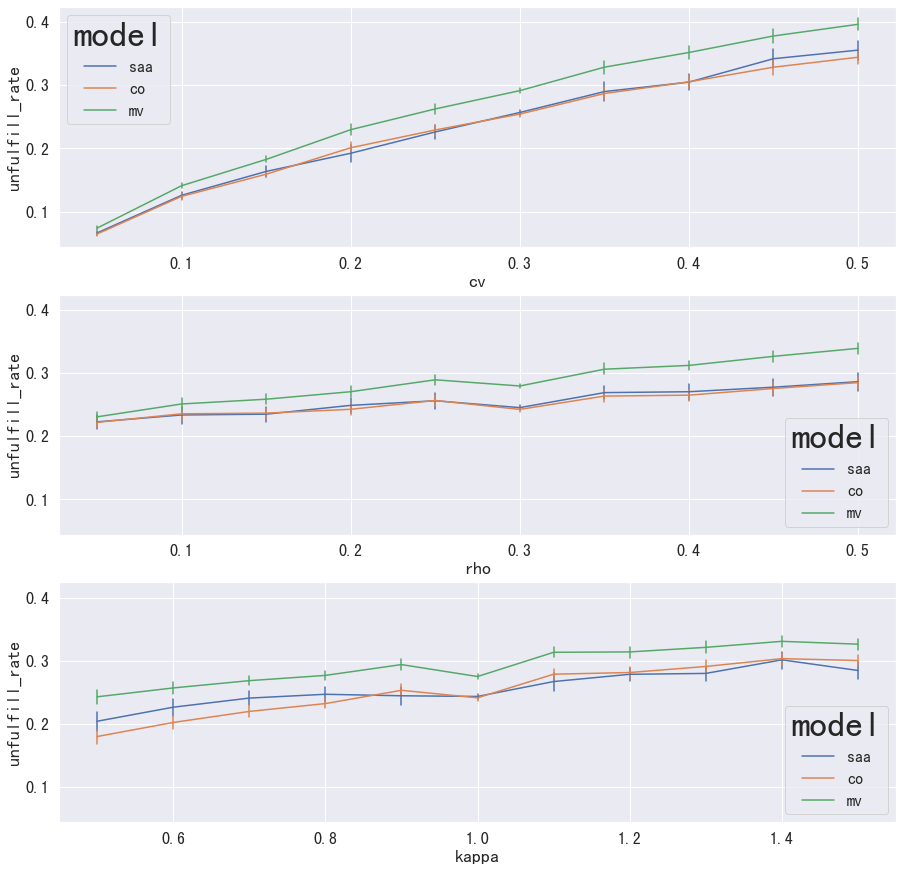

In [157]:
data = df.groupby(['model', 'cv', 'rho', 'kappa', 'graph'], as_index=False)['unfulfill_rate'].max()
f, axes = plt.subplots(nrows=3, ncols=1, sharey=True)
f.set_size_inches(15, 15)
for k, x_metric in enumerate(['cv', 'rho', 'kappa']):
    axes[k].set_xlabel(x_metric)
    sns.lineplot(x=x_metric, y="unfulfill_rate", 
                    hue='model', hue_order=['saa', 'co', 'mv'],
                    err_style="bars", ci=95,
                    data=data.groupby(['model', x_metric, 'graph'], as_index=False).mean(),
                    ax=axes[k])

## cpu time

In [160]:
df.groupby('model', as_index=False)['cpu_time'].mean()

,model,cpu_time
0,co,9.329271
1,mv,7.242851
2,saa,0.021020


# 66

In [321]:
df_66 = pd.read_csv('D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/66/e_result.csv')
df_66['obj_second_stage'] = df_66['obj'] - df_66['f'] - df_66['h']
df_66['total_demand'] =  np.fmax(df_66['sum_I']*df_66['utilization_rate'], df_66['unmet_demand']/(1-df_66['fulfill_rate']))
df_66['unfulfill_rate'] = 1 - df_66['fulfill_rate']
print(df_66.shape)
print(df_66.info())
df_66.head()

(1650000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650000 entries, 0 to 1649999
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   utilization_rate    1650000 non-null  float64
 1   fulfill_rate        1650000 non-null  float64
 2   event_fulfill_rate  1650000 non-null  float64
 3   unmet_demand        1650000 non-null  float64
 4   cnt                 1650000 non-null  int64  
 5   model               1650000 non-null  object 
 6   obj                 1650000 non-null  float64
 7   f                   1650000 non-null  float64
 8   h                   1650000 non-null  float64
 9   sum_I               1650000 non-null  float64
 10  sum_Z               1650000 non-null  float64
 11  rho                 1650000 non-null  float64
 12  cv                  1650000 non-null  float64
 13  kappa               1650000 non-null  float64
 14  cpu_time            1650000 non-null  float64
 15  t

,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,model,obj,f,h,sum_I,sum_Z,rho,cv,kappa,cpu_time,total_cost,graph,obj_second_stage,total_demand,unfulfill_rate
0,0.664157,1.0,1.0,0.0,0,co,807.061546,221.0,459.269282,3488.200787,3.0,0.3,0.3,1.0,138.033531,680.269282,0,126.792264,2316.711715,0.0
1,0.903471,1.0,1.0,0.0,1,co,807.061546,221.0,459.269282,3488.200787,3.0,0.3,0.3,1.0,138.033531,680.269282,0,126.792264,3151.489921,0.0
2,0.839450,1.0,1.0,0.0,2,co,807.061546,221.0,459.269282,3488.200787,3.0,0.3,0.3,1.0,138.033531,680.269282,0,126.792264,2928.169909,0.0
3,0.720581,1.0,1.0,0.0,3,co,807.061546,221.0,459.269282,3488.200787,3.0,0.3,0.3,1.0,138.033531,680.269282,0,126.792264,2513.531462,0.0
4,0.633533,1.0,1.0,0.0,4,co,807.061546,221.0,459.269282,3488.200787,3.0,0.3,0.3,1.0,138.033531,680.269282,0,126.792264,2209.891523,0.0


In [323]:
data = df_66.groupby(by=['graph', 'model', 'rho', 'cv', 'kappa'], as_index=False).mean()
print(data.shape)
#  data.groupby(by=['model', 'rho', 'cv'], as_index=False).count() : 20 for each (model, rho, cv)

(1650, 20)


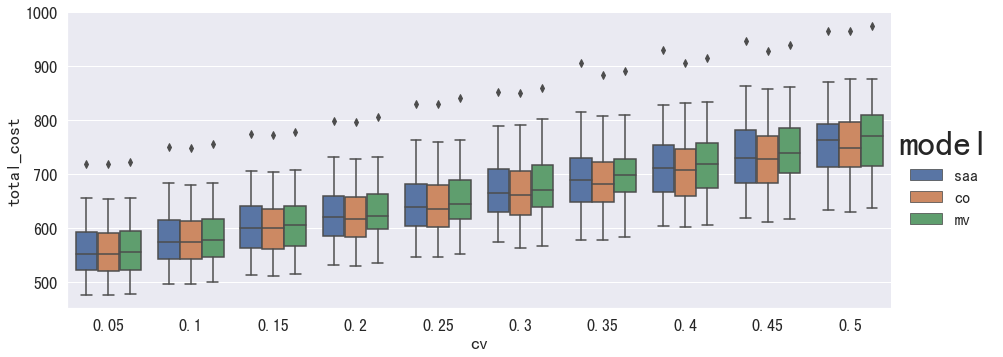

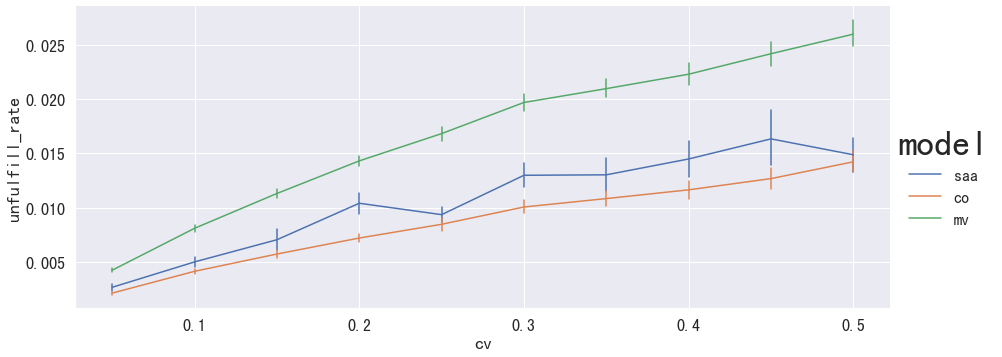

In [324]:
g = sns.catplot(x="cv", y="total_cost", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='box', 
                aspect=2.5,
                data=data.query('rho==0.3&kappa==1.0'))
g = sns.relplot(x="cv", y="unfulfill_rate", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='line', err_style="bars", ci=68,
                aspect=2.5,
                data=data.query('rho==0.3&kappa==1.0'))

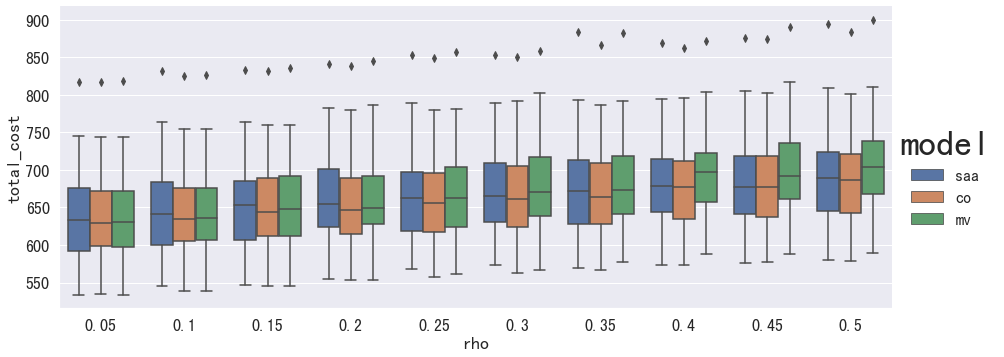

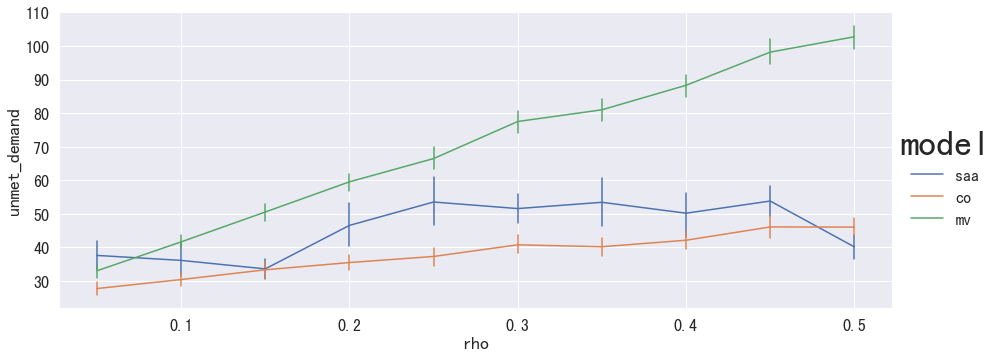

In [325]:
g = sns.catplot(x="rho", y="total_cost", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='box', 
                aspect=2.5,
                data=data.query('cv==0.3&kappa==1.0'))
g = sns.relplot(x="rho", y="unmet_demand", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='line', err_style="bars", ci=68,
                aspect=2.5,
                data=data.query('cv==0.3&kappa==1.0'))

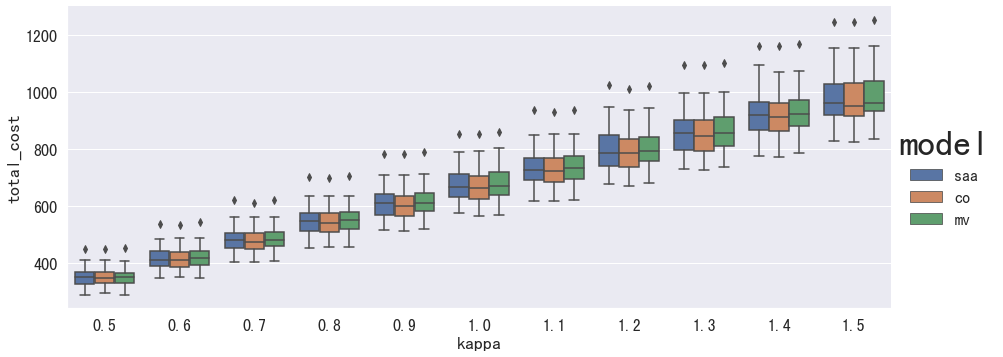

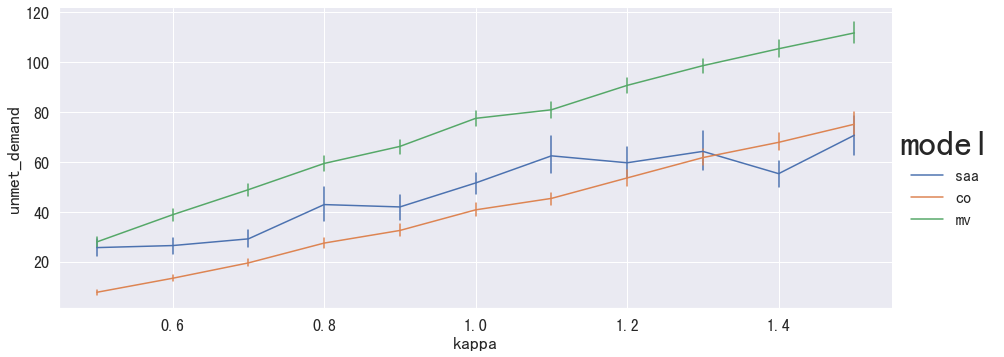

In [326]:
g = sns.catplot(x="kappa", y="total_cost", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='box', 
                aspect=2.5,
                data=data.query('cv==0.3&rho==0.3'))
g = sns.relplot(x="kappa", y="unmet_demand", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='line', err_style="bars", ci=68,
                aspect=2.5,
                data=data.query('cv==0.3&rho==0.3'))

# h=U[0.1,0.2], h~U[0.2-0.3]

In [214]:
df2 = pd.read_csv('D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/.new_inputs/44/e_result.csv')
df2['obj_second_stage'] = df2['obj'] - df2['f'] - df2['h']
df2['total_demand'] =  np.fmax(df2['sum_I']*df2['utilization_rate'], df2['unmet_demand']/(1-df2['fulfill_rate']))
df2['unfulfill_rate'] = 1 - df2['fulfill_rate']
df2['large_h'] = 1
df2.head()


,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,model,obj,f,h,sum_I,...,rho,cv,kappa,cpu_time,total_cost,graph,obj_second_stage,total_demand,unfulfill_rate,large_h
0,0.968922,1.0,1.0,0.0,0,co,666.990397,91.0,471.490824,2255.936956,...,0.3,0.3,1.0,9.046161,562.490824,0,104.499573,2185.826726,0.0,1
1,0.909903,1.0,1.0,0.0,1,co,666.990397,91.0,471.490824,2255.936956,...,0.3,0.3,1.0,9.046161,562.490824,0,104.499573,2052.684851,0.0,1
2,0.811886,1.0,1.0,0.0,2,co,666.990397,91.0,471.490824,2255.936956,...,0.3,0.3,1.0,9.046161,562.490824,0,104.499573,1831.563625,0.0,1
3,0.849762,1.0,1.0,0.0,3,co,666.990397,91.0,471.490824,2255.936956,...,0.3,0.3,1.0,9.046161,562.490824,0,104.499573,1917.009876,0.0,1
4,0.747971,1.0,1.0,0.0,4,co,666.990397,91.0,471.490824,2255.936956,...,0.3,0.3,1.0,9.046161,562.490824,0,104.499573,1687.376076,0.0,1


In [217]:
df3 = pd.concat([df2, df.query('rho==0.3&cv==0.3&kappa==1.0')])
df3.fillna(0, inplace=True)
df3.head()

,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,model,obj,f,h,sum_I,...,rho,cv,kappa,cpu_time,total_cost,graph,obj_second_stage,total_demand,unfulfill_rate,large_h
0,0.968922,1.0,1.0,0.0,0,co,666.990397,91.0,471.490824,2255.936956,...,0.3,0.3,1.0,9.046161,562.490824,0,104.499573,2185.826726,0.0,1.0
1,0.909903,1.0,1.0,0.0,1,co,666.990397,91.0,471.490824,2255.936956,...,0.3,0.3,1.0,9.046161,562.490824,0,104.499573,2052.684851,0.0,1.0
2,0.811886,1.0,1.0,0.0,2,co,666.990397,91.0,471.490824,2255.936956,...,0.3,0.3,1.0,9.046161,562.490824,0,104.499573,1831.563625,0.0,1.0
3,0.849762,1.0,1.0,0.0,3,co,666.990397,91.0,471.490824,2255.936956,...,0.3,0.3,1.0,9.046161,562.490824,0,104.499573,1917.009876,0.0,1.0
4,0.747971,1.0,1.0,0.0,4,co,666.990397,91.0,471.490824,2255.936956,...,0.3,0.3,1.0,9.046161,562.490824,0,104.499573,1687.376076,0.0,1.0


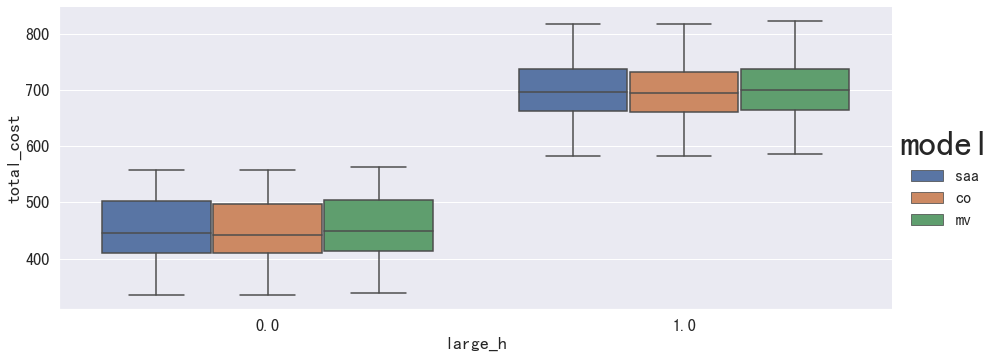

In [224]:
g = sns.catplot(x="large_h", y="total_cost", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='box', 
                aspect=2.5,
                data=df3.groupby(['model', 'graph', 'large_h'], as_index=False).mean())

In [237]:
df_tmp = df3.groupby(['model', 'large_h'], as_index=False).mean()
df_tmp = pd.merge(df_tmp, df_tmp.query('model=="saa"')[['model','large_h','f','h','total_cost']], suffixes=('', '_standard'), how='left',
                 on=['large_h'])
df_tmp

,model,large_h,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,obj,f,h,...,cpu_time,total_cost,graph,obj_second_stage,total_demand,unfulfill_rate,model_standard,f_standard,h_standard,total_cost_standard
0,co,0.0,0.802404,0.989369,0.960720,29.481823,499.5,503.673445,92.72,327.457537,...,9.747005,449.659359,24.5,83.495909,1995.627950,0.010631,saa,93.40,326.741515,453.968931
1,co,1.0,0.855104,0.974344,0.921715,68.043335,499.5,747.142307,90.40,538.337509,...,10.378148,696.780844,24.5,118.404798,1996.769717,0.025656,saa,95.78,545.217046,698.974395
2,mv,0.0,0.836514,0.981312,0.940890,50.374908,499.5,467.307948,91.06,313.708062,...,7.345187,455.142970,24.5,62.539886,1995.630474,0.018688,saa,93.40,326.741515,453.968931
3,mv,1.0,0.873359,0.966071,0.905365,88.483907,499.5,700.570876,89.16,523.654003,...,8.141562,701.297910,24.5,87.756874,1996.769717,0.033929,saa,95.78,545.217046,698.974395
4,saa,0.0,0.802789,0.987528,0.955395,33.827416,499.5,443.954218,93.40,326.741515,...,0.020583,453.968931,24.5,23.812703,1995.627950,0.012472,saa,93.40,326.741515,453.968931
5,saa,1.0,0.840763,0.978263,0.929065,57.977349,499.5,696.950317,95.78,545.217046,...,0.039303,698.974395,24.5,55.953271,inf,0.021737,saa,95.78,545.217046,698.974395


In [239]:
(df_tmp['total_cost'] - df_tmp['total_cost_standard'])/df_tmp['total_cost_standard']

0   -0.009493
1   -0.003138
2    0.002586
3    0.003324
4    0.000000
5    0.000000
dtype: float64

# f~U[50,100], f~U[30,50]

In [245]:
df2 = pd.read_csv('D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/.new_inputs/44/e_result.csv')
df2['obj_second_stage'] = df2['obj'] - df2['f'] - df2['h']
df2['total_demand'] =  np.fmax(df2['sum_I']*df2['utilization_rate'], df2['unmet_demand']/(1-df2['fulfill_rate']))
df2['unfulfill_rate'] = 1 - df2['fulfill_rate']
df2['large_f'] = 0
df3 = pd.concat([df2, df.query('rho==0.3&cv==0.3&kappa==1.0')])
df3.fillna(1, inplace=True)
df3.head()

,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,model,obj,f,h,sum_I,...,rho,cv,kappa,cpu_time,total_cost,graph,obj_second_stage,total_demand,unfulfill_rate,large_f
0,0.704559,1.0,1.0,0.0,0,co,403.732003,38.0,291.091988,2425.766566,...,0.3,0.3,1.0,6.809432,329.091988,0,74.640016,1709.094957,0.0,0.0
1,0.885899,1.0,1.0,0.0,1,co,403.732003,38.0,291.091988,2425.766566,...,0.3,0.3,1.0,6.809432,329.091988,0,74.640016,2148.985343,0.0,0.0
2,0.554077,1.0,1.0,0.0,2,co,403.732003,38.0,291.091988,2425.766566,...,0.3,0.3,1.0,6.809432,329.091988,0,74.640016,1344.060570,0.0,0.0
3,0.690168,1.0,1.0,0.0,3,co,403.732003,38.0,291.091988,2425.766566,...,0.3,0.3,1.0,6.809432,329.091988,0,74.640016,1674.186271,0.0,0.0
4,0.793865,1.0,1.0,0.0,4,co,403.732003,38.0,291.091988,2425.766566,...,0.3,0.3,1.0,6.809432,329.091988,0,74.640016,1925.730858,0.0,0.0


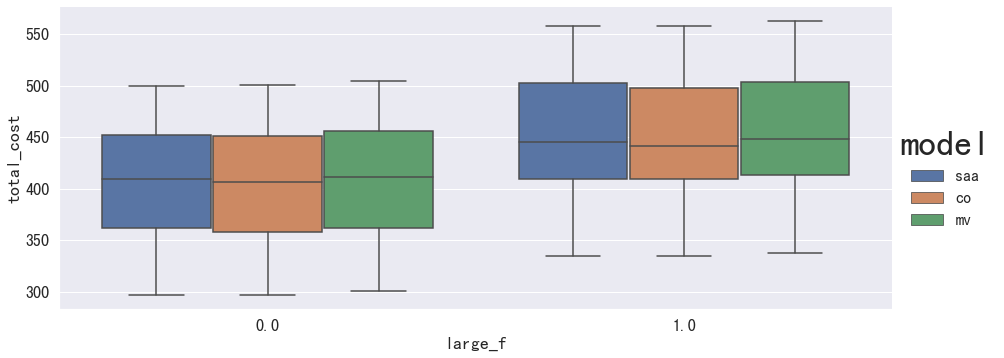

In [246]:
g = sns.catplot(x="large_f", y="total_cost", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='box', 
                aspect=2.5,
                data=df3.groupby(['model', 'graph', 'large_f'], as_index=False).mean())

In [247]:
df_tmp = df3.groupby(['model', 'large_f'], as_index=False).mean()
df_tmp = pd.merge(df_tmp, df_tmp.query('model=="saa"')[['model','large_f','f','h','total_cost']], suffixes=('', '_standard'), how='left',
                 on=['large_f'])
df_tmp

,model,large_f,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,obj,f,h,...,cpu_time,total_cost,graph,obj_second_stage,total_demand,unfulfill_rate,model_standard,f_standard,h_standard,total_cost_standard
0,co,0.0,0.796552,0.990593,0.960765,26.205754,499.5,463.595162,61.00,317.724510,...,10.855801,404.930264,24.5,84.870652,2003.509300,0.009407,saa,62.7,317.058909,407.437942
1,co,1.0,0.802404,0.989369,0.960720,29.481823,499.5,503.673445,92.72,327.457537,...,9.747005,449.659359,24.5,83.495909,1995.627950,0.010631,saa,93.4,326.741515,453.968931
2,mv,0.0,0.831519,0.983280,0.942220,45.393659,499.5,430.118567,60.36,303.666297,...,7.952534,409.419956,24.5,66.092270,2003.509300,0.016720,saa,62.7,317.058909,407.437942
3,mv,1.0,0.836514,0.981312,0.940890,50.374908,499.5,467.307948,91.06,313.708062,...,7.345187,455.142970,24.5,62.539886,1995.630474,0.018688,saa,93.4,326.741515,453.968931
4,saa,0.0,0.793943,0.989985,0.956810,27.679033,499.5,403.897530,62.70,317.058909,...,0.036969,407.437942,24.5,24.138622,2003.509300,0.010015,saa,62.7,317.058909,407.437942
5,saa,1.0,0.802789,0.987528,0.955395,33.827416,499.5,443.954218,93.40,326.741515,...,0.020583,453.968931,24.5,23.812703,1995.627950,0.012472,saa,93.4,326.741515,453.968931


In [248]:
(df_tmp['total_cost'] - df_tmp['total_cost_standard'])/df_tmp['total_cost_standard']

0   -0.006155
1   -0.009493
2    0.004865
3    0.002586
4    0.000000
5    0.000000
dtype: float64

# \mu~[450,550], \mu~[250,750]

In [249]:
df2 = pd.read_csv('D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/.new_inputs/44/e_result.csv')
df2['obj_second_stage'] = df2['obj'] - df2['f'] - df2['h']
df2['total_demand'] =  np.fmax(df2['sum_I']*df2['utilization_rate'], df2['unmet_demand']/(1-df2['fulfill_rate']))
df2['unfulfill_rate'] = 1 - df2['fulfill_rate']
df2['large_mu'] = 1
df3 = pd.concat([df2, df.query('rho==0.3&cv==0.3&kappa==1.0')])
df3.fillna(0, inplace=True)
df3.head()

,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,model,obj,f,h,sum_I,...,rho,cv,kappa,cpu_time,total_cost,graph,obj_second_stage,total_demand,unfulfill_rate,large_mu
0,0.909560,1.00000,1.00,0.000000,0,co,573.760227,95.0,388.754314,2136.012717,...,0.3,0.3,1.0,9.445346,483.754314,0,90.005913,1942.831080,0.00000,1.0
1,1.000000,0.91129,0.75,207.931399,1,co,573.760227,95.0,388.754314,2136.012717,...,0.3,0.3,1.0,9.445346,691.685714,0,90.005913,2343.944116,0.08871,1.0
2,1.000000,0.90516,0.75,223.805432,2,co,573.760227,95.0,388.754314,2136.012717,...,0.3,0.3,1.0,9.445346,707.559746,0,90.005913,2359.818149,0.09484,1.0
3,0.542323,1.00000,1.00,0.000000,3,co,573.760227,95.0,388.754314,2136.012717,...,0.3,0.3,1.0,9.445346,483.754314,0,90.005913,1158.409376,0.00000,1.0
4,0.936401,1.00000,1.00,0.000000,4,co,573.760227,95.0,388.754314,2136.012717,...,0.3,0.3,1.0,9.445346,483.754314,0,90.005913,2000.163936,0.00000,1.0


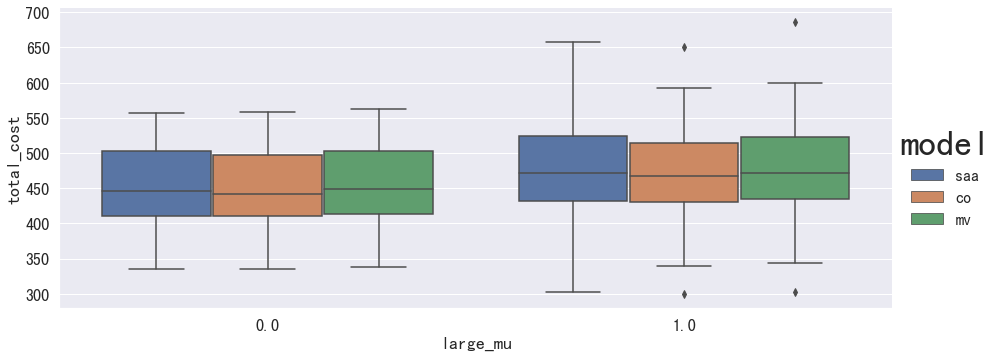

In [250]:
g = sns.catplot(x="large_mu", y="total_cost", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='box', 
                aspect=2.5,
                data=df3.groupby(['model', 'graph', 'large_mu'], as_index=False).mean())

In [251]:
df_tmp = df3.groupby(['model', 'large_mu'], as_index=False).mean()
df_tmp = pd.merge(df_tmp, df_tmp.query('model=="saa"')[['model','large_mu','f','h','total_cost']], suffixes=('', '_standard'), how='left',
                 on=['large_mu'])
df_tmp

,model,large_mu,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,obj,f,h,...,cpu_time,total_cost,graph,obj_second_stage,total_demand,unfulfill_rate,model_standard,f_standard,h_standard,total_cost_standard
0,co,0.0,0.802404,0.989369,0.960720,29.481823,499.5,503.673445,92.72,327.457537,...,9.747005,449.659359,24.5,83.495909,1995.627950,0.010631,saa,93.40,326.741515,453.968931
1,co,1.0,0.804488,0.988280,0.952885,31.470376,499.5,524.291088,102.12,335.730353,...,10.108334,469.320729,24.5,86.440735,inf,0.011720,saa,105.62,334.767627,472.277535
2,mv,0.0,0.836514,0.981312,0.940890,50.374908,499.5,467.307948,91.06,313.708062,...,7.345187,455.142970,24.5,62.539886,1995.630474,0.018688,saa,93.40,326.741515,453.968931
3,mv,1.0,0.836506,0.980406,0.932070,51.721723,499.5,489.707735,98.34,325.213940,...,8.418885,475.275662,24.5,66.153795,inf,0.019594,saa,105.62,334.767627,472.277535
4,saa,0.0,0.802789,0.987528,0.955395,33.827416,499.5,443.954218,93.40,326.741515,...,0.020583,453.968931,24.5,23.812703,1995.627950,0.012472,saa,93.40,326.741515,453.968931
5,saa,1.0,0.798622,0.988062,0.952145,31.889908,499.5,465.628814,105.62,334.767627,...,0.037826,472.277535,24.5,25.241186,1962.790554,0.011938,saa,105.62,334.767627,472.277535


In [252]:
(df_tmp['total_cost'] - df_tmp['total_cost_standard'])/df_tmp['total_cost_standard']

0   -0.009493
1   -0.006261
2    0.002586
3    0.006348
4    0.000000
5    0.000000
dtype: float64

# arcs = m*2.4

In [253]:
df2 = pd.read_csv('D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/.new_inputs/44/e_result.csv')
df2['obj_second_stage'] = df2['obj'] - df2['f'] - df2['h']
df2['total_demand'] =  np.fmax(df2['sum_I']*df2['utilization_rate'], df2['unmet_demand']/(1-df2['fulfill_rate']))
df2['unfulfill_rate'] = 1 - df2['fulfill_rate']
df2['large_arcs'] = 0
df3 = pd.concat([df2, df.query('rho==0.3&cv==0.3&kappa==1.0')])
df3.fillna(1, inplace=True)
df3.head()

,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,model,obj,f,h,sum_I,...,rho,cv,kappa,cpu_time,total_cost,graph,obj_second_stage,total_demand,unfulfill_rate,large_arcs
0,0.616545,1.0,1.0,0.0,0,co,586.548326,136.0,356.637028,2374.414766,...,0.3,0.3,1.0,8.056725,492.637028,0,93.911298,1463.934528,0.0,0.0
1,0.630608,1.0,1.0,0.0,1,co,586.548326,136.0,356.637028,2374.414766,...,0.3,0.3,1.0,8.056725,492.637028,0,93.911298,1497.325654,0.0,0.0
2,0.775597,1.0,1.0,0.0,2,co,586.548326,136.0,356.637028,2374.414766,...,0.3,0.3,1.0,8.056725,492.637028,0,93.911298,1841.589859,0.0,0.0
3,0.854857,1.0,1.0,0.0,3,co,586.548326,136.0,356.637028,2374.414766,...,0.3,0.3,1.0,8.056725,492.637028,0,93.911298,2029.785584,0.0,0.0
4,0.632852,1.0,1.0,0.0,4,co,586.548326,136.0,356.637028,2374.414766,...,0.3,0.3,1.0,8.056725,492.637028,0,93.911298,1502.654061,0.0,0.0


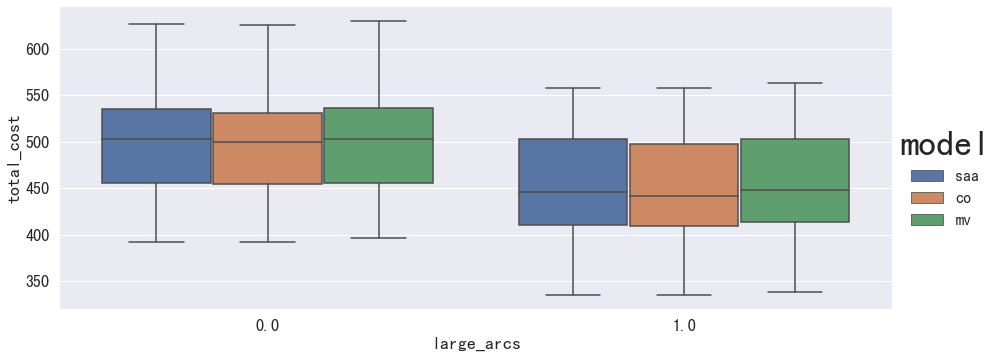

In [254]:
g = sns.catplot(x="large_arcs", y="total_cost", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='box', 
                aspect=2.5,
                data=df3.groupby(['model', 'graph', 'large_arcs'], as_index=False).mean())

In [256]:
df_tmp = df3.groupby(['model', 'large_arcs'], as_index=False).mean()
df_tmp = pd.merge(df_tmp, df_tmp.query('model=="saa"')[['model','large_arcs','f','h','total_cost']], suffixes=('', '_standard'), how='left',
                 on=['large_arcs'])
df_tmp

,model,large_arcs,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,obj,f,h,...,cpu_time,total_cost,graph,obj_second_stage,total_demand,unfulfill_rate,model_standard,f_standard,h_standard,total_cost_standard
0,co,0.0,0.799289,0.989191,0.953980,29.891315,499.5,558.221831,126.66,340.848503,...,6.478103,497.399818,24.5,90.713328,2005.740247,0.010809,saa,128.96,340.909111,501.366470
1,co,1.0,0.802404,0.989369,0.960720,29.481823,499.5,503.673445,92.72,327.457537,...,9.747005,449.659359,24.5,83.495909,1995.627950,0.010631,saa,93.40,326.741515,453.968931
2,mv,0.0,0.830683,0.982116,0.935875,48.359886,499.5,525.669085,125.58,327.685538,...,5.190891,501.625425,24.5,72.403546,2005.742272,0.017884,saa,128.96,340.909111,501.366470
3,mv,1.0,0.836514,0.981312,0.940890,50.374908,499.5,467.307948,91.06,313.708062,...,7.345187,455.142970,24.5,62.539886,1995.630474,0.018688,saa,93.40,326.741515,453.968931
4,saa,0.0,0.795114,0.988411,0.949695,31.497359,499.5,496.749454,128.96,340.909111,...,0.034546,501.366470,24.5,26.880344,inf,0.011589,saa,128.96,340.909111,501.366470
5,saa,1.0,0.802789,0.987528,0.955395,33.827416,499.5,443.954218,93.40,326.741515,...,0.020583,453.968931,24.5,23.812703,1995.627950,0.012472,saa,93.40,326.741515,453.968931


In [257]:
(df_tmp['total_cost'] - df_tmp['total_cost_standard'])/df_tmp['total_cost_standard']

0   -0.007912
1   -0.009493
2    0.000516
3    0.002586
4    0.000000
5    0.000000
dtype: float64

# arcs = 2.4 (6,6)

In [277]:
df2 = pd.read_csv('D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/.new_inputs/66/e_result.csv')
df2['obj_second_stage'] = df2['obj'] - df2['f'] - df2['h']
df2['total_demand'] =  np.fmax(df2['sum_I']*df2['utilization_rate'], df2['unmet_demand']/(1-df2['fulfill_rate']))
df2['unfulfill_rate'] = 1 - df2['fulfill_rate']
df2['large_arcs'] = 0
df3 = pd.concat([df2, df.query('rho==0.3&cv==0.3&kappa==1.0')])
df3.fillna(1, inplace=True)
df3.head()

,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,model,obj,f,h,sum_I,...,rho,cv,kappa,cpu_time,total_cost,graph,obj_second_stage,total_demand,unfulfill_rate,large_arcs
0,0.497249,1.0,1.0,0.0,0,co,896.602605,192.0,555.350297,3734.691244,...,0.3,0.3,1.0,55.249555,747.350297,0,149.252308,1857.069907,0.0,0.0
1,0.949339,1.0,1.0,0.0,1,co,896.602605,192.0,555.350297,3734.691244,...,0.3,0.3,1.0,55.249555,747.350297,0,149.252308,3545.487745,0.0,0.0
2,0.818966,1.0,1.0,0.0,2,co,896.602605,192.0,555.350297,3734.691244,...,0.3,0.3,1.0,55.249555,747.350297,0,149.252308,3058.585590,0.0,0.0
3,0.791055,1.0,1.0,0.0,3,co,896.602605,192.0,555.350297,3734.691244,...,0.3,0.3,1.0,55.249555,747.350297,0,149.252308,2954.346463,0.0,0.0
4,0.876484,1.0,1.0,0.0,4,co,896.602605,192.0,555.350297,3734.691244,...,0.3,0.3,1.0,55.249555,747.350297,0,149.252308,3273.395672,0.0,0.0


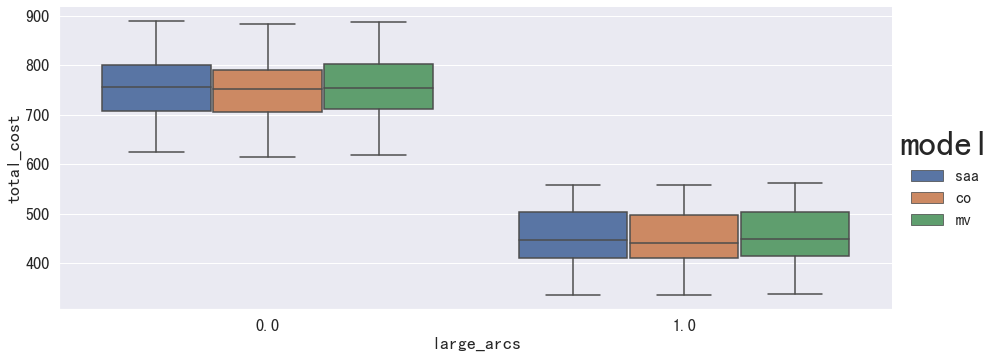

In [278]:
g = sns.catplot(x="large_arcs", y="total_cost", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='box', 
                aspect=2.5,
                data=df3.groupby(['model', 'graph', 'large_arcs'], as_index=False).mean())

In [280]:
df_tmp = df3.groupby(['model', 'large_arcs'], as_index=False).mean()
df_tmp = pd.merge(df_tmp, df_tmp.query('model=="saa"')[['model','large_arcs','f','h','total_cost']], suffixes=('', '_standard'), how='left',
                 on=['large_arcs'])
df_tmp

,model,large_arcs,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,obj,f,h,...,cpu_time,total_cost,graph,obj_second_stage,total_demand,unfulfill_rate,model_standard,f_standard,h_standard,total_cost_standard
0,co,0.0,0.799165,0.988893,0.952083,44.036905,499.5,841.841648,192.74,511.390835,...,83.218903,748.167739,24.5,137.710813,inf,0.011107,saa,198.26,507.575666,755.164100
1,co,1.0,0.802404,0.989369,0.960720,29.481823,499.5,503.673445,92.72,327.457537,...,9.747005,449.659359,24.5,83.495909,1995.627950,0.010631,saa,93.40,326.741515,453.968931
2,mv,0.0,0.833506,0.981481,0.933717,72.330467,499.5,792.890337,191.48,490.243091,...,54.633004,754.053559,24.5,111.167246,inf,0.018519,saa,198.26,507.575666,755.164100
3,mv,1.0,0.836514,0.981312,0.940890,50.374908,499.5,467.307948,91.06,313.708062,...,7.345187,455.142970,24.5,62.539886,1995.630474,0.018688,saa,93.40,326.741515,453.968931
4,saa,0.0,0.799222,0.987427,0.947233,49.328433,499.5,743.738762,198.26,507.575666,...,0.059059,755.164100,24.5,37.903096,inf,0.012573,saa,198.26,507.575666,755.164100
5,saa,1.0,0.802789,0.987528,0.955395,33.827416,499.5,443.954218,93.40,326.741515,...,0.020583,453.968931,24.5,23.812703,1995.627950,0.012472,saa,93.40,326.741515,453.968931


In [281]:
(df_tmp['total_cost'] - df_tmp['total_cost_standard'])/df_tmp['total_cost_standard']

0   -0.009265
1   -0.009493
2   -0.001471
3    0.002586
4    0.000000
5    0.000000
dtype: float64

In [279]:
df2.groupby(['model'])['cpu_time'].mean()

model
co     83.218903
mv     54.633004
saa     0.059059
Name: cpu_time, dtype: float64

# arcs2.4 mu=250 (6, 6)

In [318]:
df2 = pd.read_csv('D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/.new_inputs/66/e_result.csv')
df2['obj_second_stage'] = df2['obj'] - df2['f'] - df2['h']
df2['total_demand'] =  np.fmax(df2['sum_I']*df2['utilization_rate'], df2['unmet_demand']/(1-df2['fulfill_rate']))
df2['unfulfill_rate'] = 1 - df2['fulfill_rate']
df2['treatment'] = 1
df3 = pd.concat([df2, df.query('rho==0.3&cv==0.3&kappa==1.0')])
df3.fillna(0, inplace=True)
df3.head()

,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,model,obj,f,h,sum_I,...,rho,cv,kappa,cpu_time,total_cost,graph,obj_second_stage,total_demand,unfulfill_rate,treatment
0,0.466134,1.0,1.0,0.0,0,co,478.9939,194.0,221.948306,1806.147591,...,0.3,0.3,1.0,79.45231,415.948306,0,63.045594,841.906052,0.0,1.0
1,0.728484,1.0,1.0,0.0,1,co,478.9939,194.0,221.948306,1806.147591,...,0.3,0.3,1.0,79.45231,415.948306,0,63.045594,1315.750217,0.0,1.0
2,0.679646,1.0,1.0,0.0,2,co,478.9939,194.0,221.948306,1806.147591,...,0.3,0.3,1.0,79.45231,415.948306,0,63.045594,1227.540609,0.0,1.0
3,0.804177,1.0,1.0,0.0,3,co,478.9939,194.0,221.948306,1806.147591,...,0.3,0.3,1.0,79.45231,415.948306,0,63.045594,1452.462145,0.0,1.0
4,0.449006,1.0,1.0,0.0,4,co,478.9939,194.0,221.948306,1806.147591,...,0.3,0.3,1.0,79.45231,415.948306,0,63.045594,810.971585,0.0,1.0


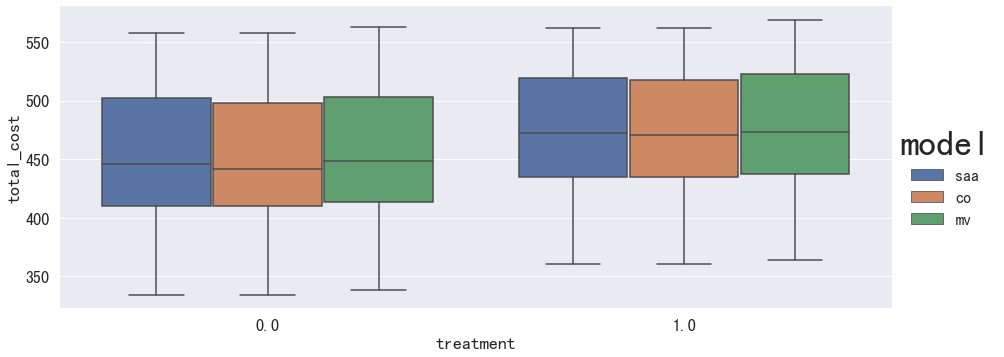

In [319]:
g = sns.catplot(x="treatment", y="total_cost", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='box', 
                aspect=2.5,
                data=df3.groupby(['model', 'graph', 'treatment'], as_index=False).mean())

# acrs2.4 epsilon=0.2 88

### analysis focus on (rho, cv, kappa) = (0.3, 0.3, 1.0)

In [3]:
df_88 = pd.read_csv('D:/[PAPER]NetworkDesign Distributionally Robust/numerical/balanced_system/.new_inputs/88/e_result.csv')
df_88 = df_88.query('rho==0.3&cv==0.3&kappa==1.0')
df_88['obj_second_stage'] = df_88['obj'] - df_88['f'] - df_88['h']
df_88['total_demand'] =  np.fmax(df_88['sum_I']*df_88['utilization_rate'], df_88['unmet_demand']/(1-df_88['fulfill_rate']))
df_88.loc[df_88['total_demand']==np.inf, 'total_demand'] = df_88['utilization_rate'] * df_88['sum_I']
df_88['unfulfill_rate'] = 1 - df_88['fulfill_rate']
df_88['treatment'] = 1
df3 = pd.concat([df_88, df.query('rho==0.3&cv==0.3&kappa==1.0')])
df3.fillna(0, inplace=True)
df3.head()

NameError: name 'df' is not defined

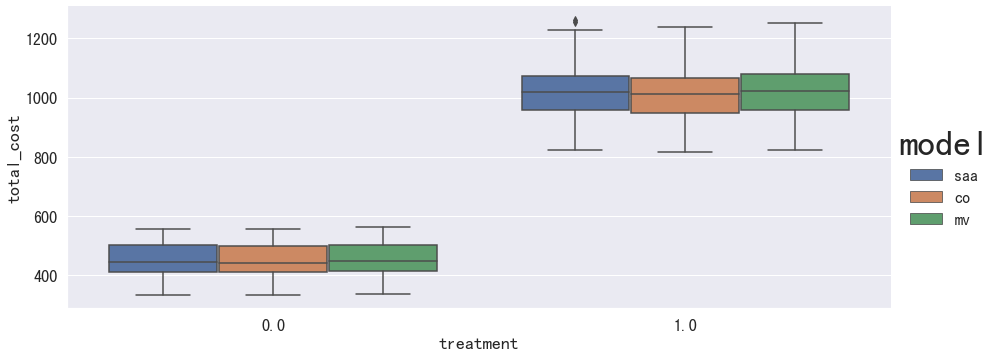

In [59]:
g = sns.catplot(x="treatment", y="total_cost", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='box', 
                aspect=2.5,
                data=df3.groupby(['model', 'graph', 'treatment'], as_index=False).mean())

In [45]:
df_tmp = df3.groupby(['model', 'treatment'], as_index=False).mean()
df_tmp = pd.merge(df_tmp, df_tmp.query('model=="saa"')[['model','treatment','f','h','total_cost']], suffixes=('', '_standard'), how='left',
                 on=['treatment'])
df_tmp

,model,treatment,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,obj,f,h,...,cpu_time,total_cost,graph,obj_second_stage,total_demand,unfulfill_rate,model_standard,f_standard,h_standard,total_cost_standard
0,co,0.0,0.802404,0.989369,0.960720,29.481823,499.5,503.673445,92.720000,327.457537,...,9.747005,449.659359,24.500000,83.495909,1995.627950,0.010631,saa,93.400000,326.741515,453.968931
1,co,1.0,0.801501,0.988959,0.952871,57.731701,499.5,1119.974443,259.164122,679.564718,...,888.509730,996.460541,76.106870,181.245603,4004.856367,0.011041,saa,271.007692,663.796806,1003.469353
2,mv,0.0,0.836514,0.981312,0.940890,50.374908,499.5,467.307948,91.060000,313.708062,...,7.345187,455.142970,24.500000,62.539886,1995.630474,0.018688,saa,93.400000,326.741515,453.968931
3,mv,1.0,0.838636,0.981007,0.935512,98.100211,499.5,1052.495493,256.807692,651.007293,...,445.014553,1005.915196,76.676923,144.680508,4004.652201,0.018993,saa,271.007692,663.796806,1003.469353
4,saa,0.0,0.802789,0.987528,0.955395,33.827416,499.5,443.954218,93.400000,326.741515,...,0.020583,453.968931,24.500000,23.812703,1995.627950,0.012472,saa,93.400000,326.741515,453.968931
5,saa,1.0,0.809393,0.986720,0.945630,68.664855,499.5,984.089767,271.007692,663.796806,...,0.049692,1003.469353,76.676923,49.285269,4004.653789,0.013280,saa,271.007692,663.796806,1003.469353


In [60]:
df_88.groupby(['model'], as_index=False).mean()[['model','total_cost']]

,model,total_cost
0,co,1012.746583
1,mv,1022.797603
2,saa,1020.452431


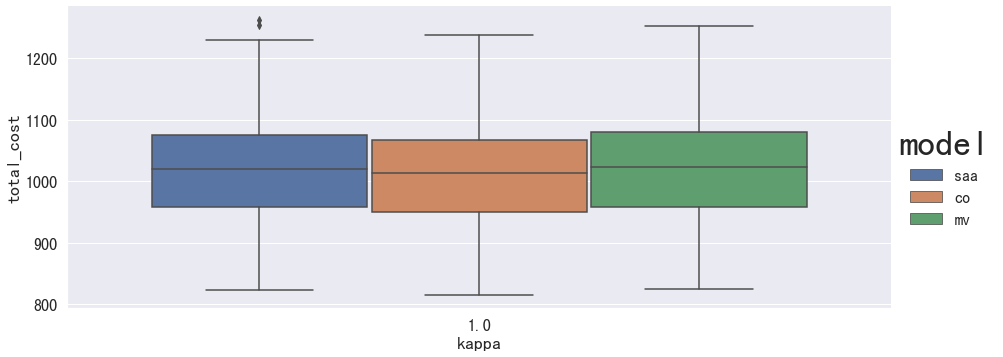

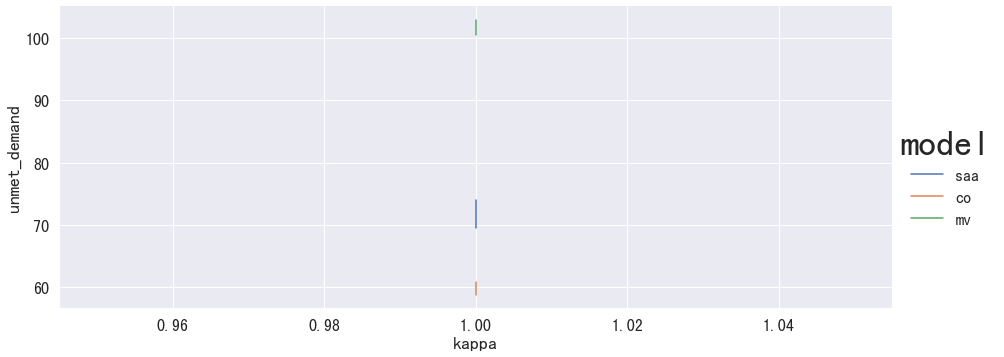

In [61]:
g = sns.catplot(x="kappa", y="total_cost", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='box', 
                aspect=2.5,
                data=df_88.groupby(by=['graph', 'model', 'rho', 'cv', 'kappa'], as_index=False).mean().query('cv==0.3&rho==0.3&kappa==1'))
g = sns.relplot(x="kappa", y="unmet_demand", 
                hue='model', hue_order=['saa', 'co', 'mv'],
                kind='line', err_style="bars", ci=68,
                aspect=2.5,
                data=df_88.groupby(by=['graph', 'model', 'rho', 'cv', 'kappa'], as_index=False).mean().query('cv==0.3&rho==0.3&kappa==1.0'))

In [62]:
data = df_88.groupby(by=['model', 'rho', 'cv', 'kappa'], as_index=False).mean()
data.query('cv==0.3&rho==0.3&kappa==1.0')[['model', 'obj', 'h', 'f','obj_second_stage', 'total_cost', 'unmet_demand', 'fulfill_rate']]

,model,obj,h,f,obj_second_stage,total_cost,unmet_demand,fulfill_rate
0,co,1137.994859,691.907279,260.985,185.102581,1012.746583,59.854304,0.988542
1,mv,1068.264272,663.591939,257.470,147.202333,1022.797603,101.735664,0.980269
2,saa,1000.426298,680.595968,268.055,51.775329,1020.452431,71.801462,0.986088


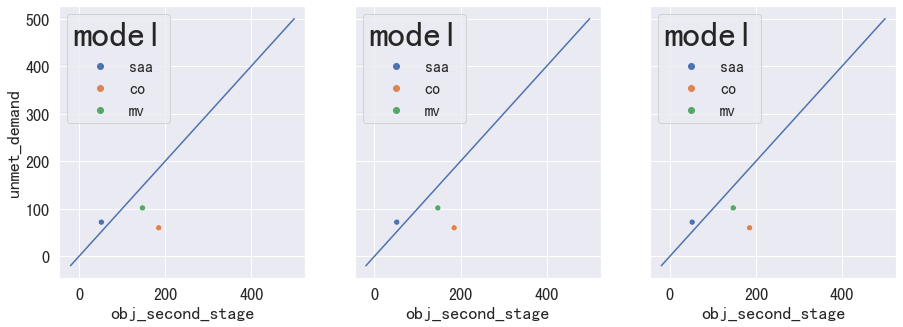

In [63]:
f, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
f.set_size_inches(15, 5)
for k, query_sentence in enumerate(['cv==0.3&rho==0.3', 'cv==0.3&kappa==1.0', 'rho==0.3&kappa==1.0']):
    ax = sns.scatterplot(x='obj_second_stage', y='unmet_demand', 
                        hue='model', hue_order=['saa','co','mv'], 
                        data=data.query(query_sentence),
                        ax=axes[k])
    ax.plot(np.linspace(-20,500,1000), np.linspace(-20,500,1000))


In [64]:
df_88.groupby(['model', 'graph'], as_index=False).quantile(0.95).groupby(['model']).mean()

,graph,utilization_rate,fulfill_rate,event_fulfill_rate,unmet_demand,cnt,obj,f,h,sum_I,sum_Z,rho,cv,kappa,cpu_time,total_cost,obj_second_stage,total_demand,unfulfill_rate,treatment
model,,,,,,,,,,,,,,,,,,,,
co,99.5,0.995189,1.0,1.0,383.802052,949.05,1137.994859,260.985,691.907279,4921.039568,3.525,0.3,0.3,1.0,878.025469,1336.694330,185.102581,5230.200597,0.074074,1.0
mv,99.5,0.998874,1.0,1.0,619.840857,949.05,1068.264272,257.470,663.591939,4647.291390,3.470,0.3,0.3,1.0,466.023024,1540.902796,147.202333,5230.200597,0.118796,1.0
saa,99.5,0.994000,1.0,1.0,437.952795,949.05,1000.426298,268.055,680.595968,4868.308640,3.630,0.3,0.3,1.0,0.049284,1386.603763,51.775329,5230.200597,0.084424,1.0


In [1]:
f, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
f.set_size_inches(15, 5)
g = sns.histplot(x='total_cost',
                 hue='model', hue_order=['saa', 'co','mv'],
                 stat='count', multiple='layer',
                 binwidth=5,
                data=df_88.query('cv==0.3&rho==0.3&kappa==1.0').groupby(['graph', 'model'], as_index=False).mean(),
                ax=axes[0])

NameError: name 'plt' is not defined